In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
%%notify
iris_df = pd.read_csv('iris.csv')

<IPython.core.display.Javascript object>

In [4]:
len(iris_df)

149

In [5]:
iris_df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [6]:
iris_df.columns = ['sepal length','sepal_width','petal length','petal_width','species']

In [7]:
iris_df

,sepal length,sepal_width,petal length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [8]:
iris_df.shape

(149, 5)

In [9]:
iris_df['species'].value_counts()  # to know the number of values in each class
# since here all 3 class have almost eqaul number of rows hence it is a balanced datasets.

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: species, dtype: int64

### 2D scatter plot 

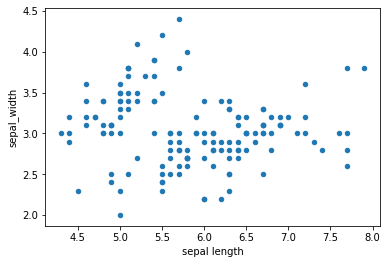

In [10]:
iris_df.plot(kind='scatter',x = 'sepal length', y = 'sepal_width')

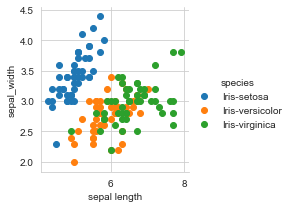

In [11]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_df, hue='species').map(plt.scatter,'sepal length', 'sepal_width').add_legend()

### 3-D scatter plots 

pairplot is used to visualise higher dimensions. It takes the pairs of features and plot it.
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each
variable in ``data`` will by shared in the y-axis across a single row and
in the x-axis across a single column. The diagonal Axes are treated
differently, drawing a plot to show the univariate distribution of the data
for the variable in that column.

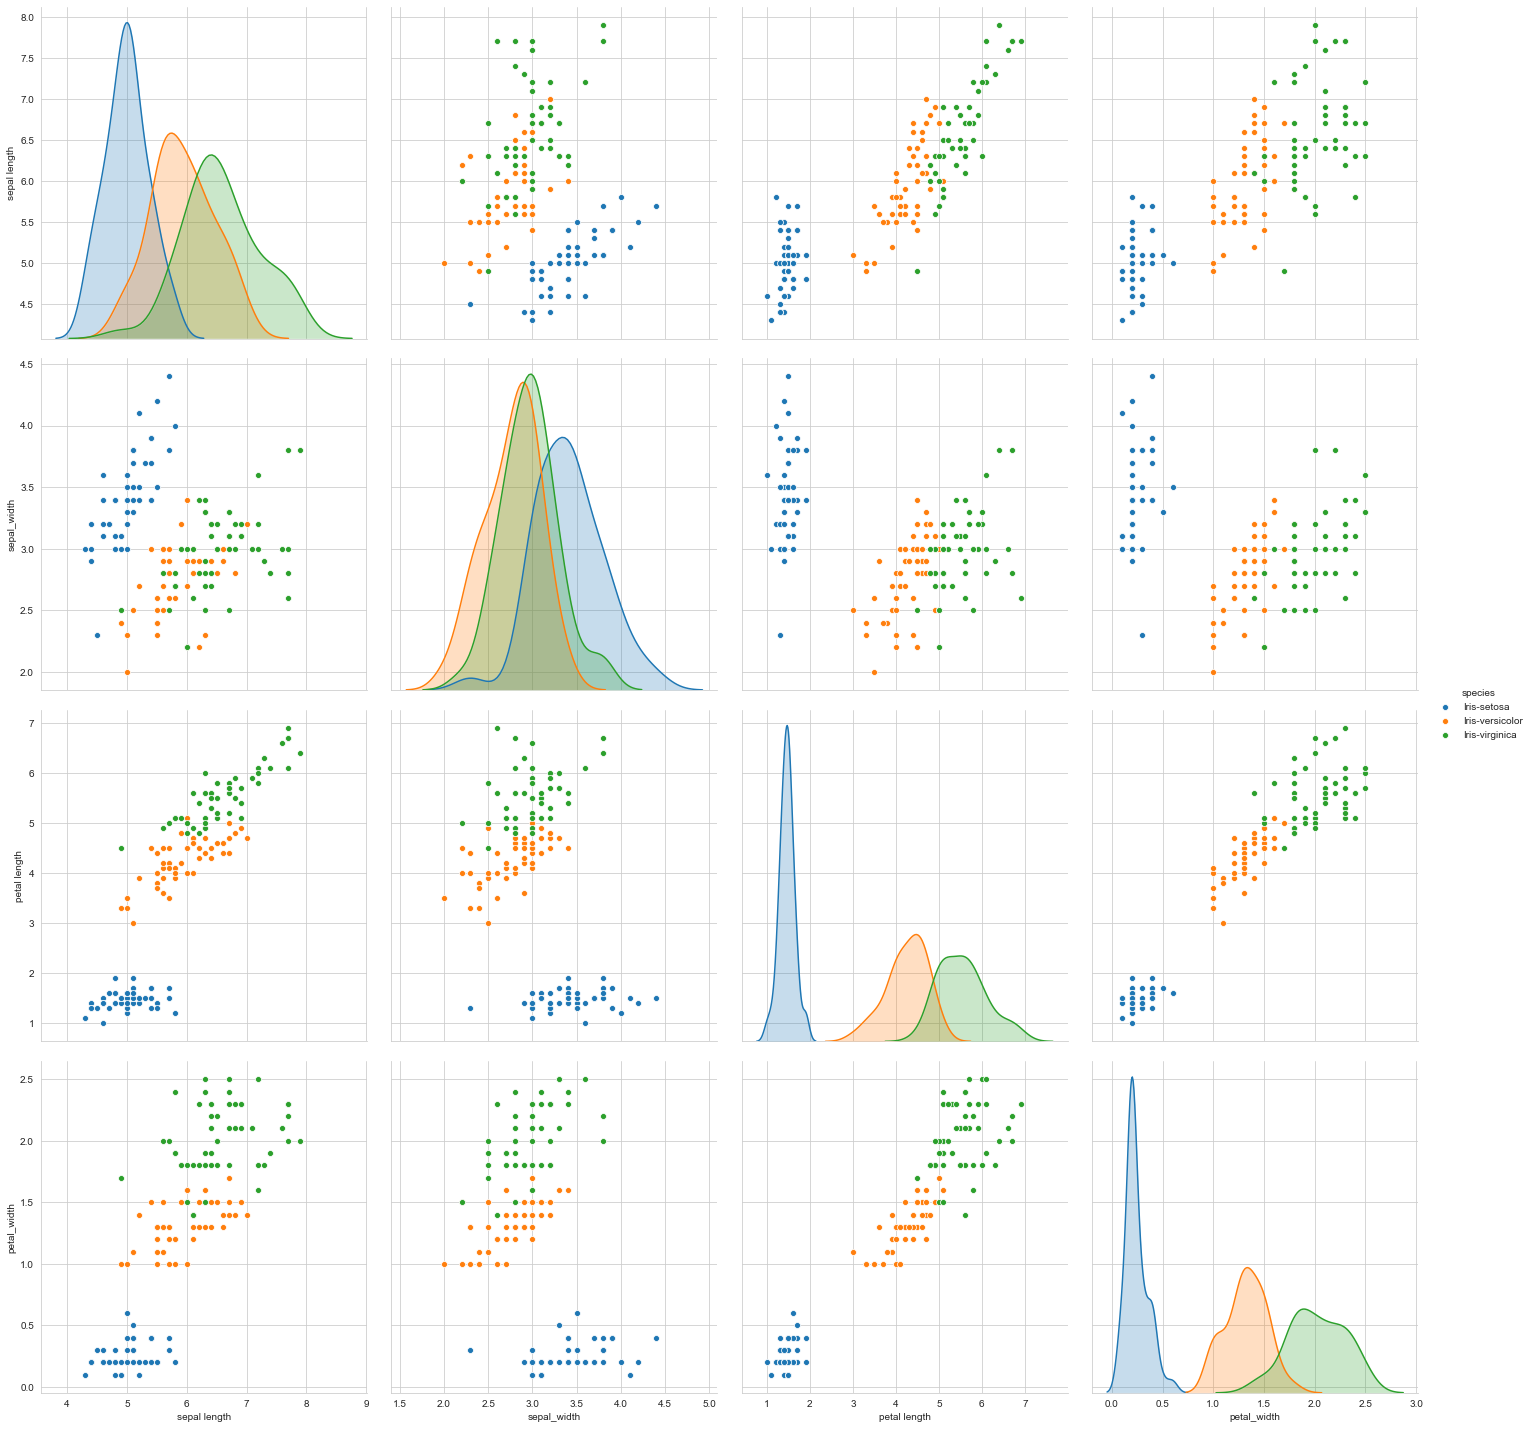

In [12]:
sns.set_style('whitegrid');
sns.pairplot(iris_df,hue='species',kind='scatter',height = 5)

Observations:
1. Petal length and Petal width are the most important features to identify various flower types.
2. While setosa can be easily identified, the other 2 classes are overlapped(are not linearly seperable).
3. we can easily draw a line between the setosa and if else to classify the other 2 classes


Limitations:
They are easy to understand but when the dimensions of the data increases they pairplot becomes difficult to understand as there are so many plots to go through.
for such cases  we use PCA, linearly Algebra, t-SNE

## Histograms/ CDF/ PDF 

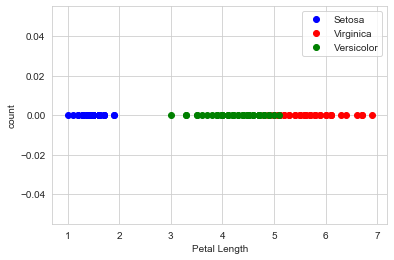

In [13]:
iris_setosa = iris_df.loc[iris_df['species']=='Iris-setosa']
iris_virginica = iris_df.loc[iris_df['species']=='Iris-virginica']
iris_versicolor = iris_df.loc[iris_df['species']=='Iris-versicolor']

plt.xlabel('Petal Length')
plt.ylabel('count')
plt.plot(iris_setosa['petal length'], np.zeros_like(iris_setosa['petal length']) , 'bo',label='Setosa')
plt.plot(iris_virginica['petal length'], np.zeros_like(iris_virginica['petal length']) , 'ro',label='Virginica')
plt.plot(iris_versicolor['petal length'], np.zeros_like(iris_versicolor['petal length']) , 'go',label='Versicolor') # np.zeros_like will return a array of zeros same shape as of the argument
plt.legend()

This is a 1 D scatter plot.
Now some points in the above plots are visibl but there are regions where you don't know that how many points exists in that space like between 4 and 5.
so, what we do is we divide the regions into smaller sub-regions and take the counts of the number of datapoints exists between those points on Y-axis.
on X-axis we take our 1 varriable . Such plots are called Histogram.

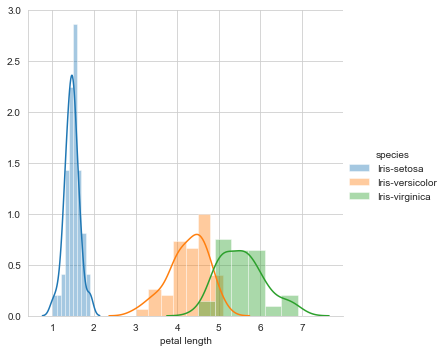

In [14]:
# histogram of petal length of all three class
sns.FacetGrid(iris_df, hue='species', height=5)\
    .map(sns.distplot, 'petal length')\
    .add_legend()

PDF(probability density function) are smoothed histogram.they are smoothed using kernel density estimation
## Observations
1. we cannot find any setosa flower which is more that 2.5 hence it can be easily identified and seperated.
2. The PDF's of verginica and versicolor are overlapping, hence cant be separated perfectly.
3. At the overlapped area we should see which class have more density at that point, the class having more density will have more points at that point.


### Univariate Analysis 

In this we will analyse each of the variable separately. 
points to remember about PDF is that the best plot is the one which has no overlap or minimum overlap, and further the plots the better plot it is.
Below the plot with respect to each variable is given. If we have to choose any one of the feature we should choose petal_length and it is separating setosa perfectly,whereas petal_width also does the fairly good job but since there is a small intersection between setosa and versicolor the other feature is much better.
BUt, incase we need 2 features we must see the pairplot and decide. 

Sepal length and sepal width does a very poor job and should not be used here as there is a large intersection between the plot's area. 

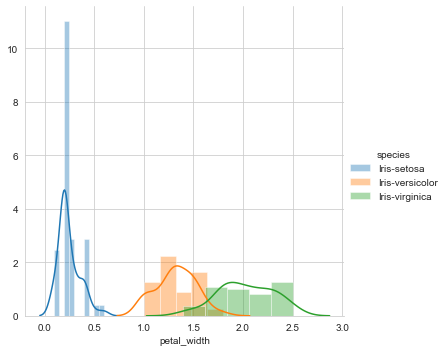

In [15]:
sns.FacetGrid(iris_df,hue = 'species',height=5)\
.map(sns.distplot,'petal_width').add_legend()

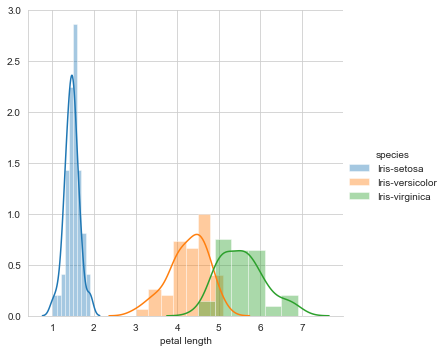

In [16]:
sns.FacetGrid(iris_df,hue = 'species',height=5)\
.map(sns.distplot,'petal length').add_legend()

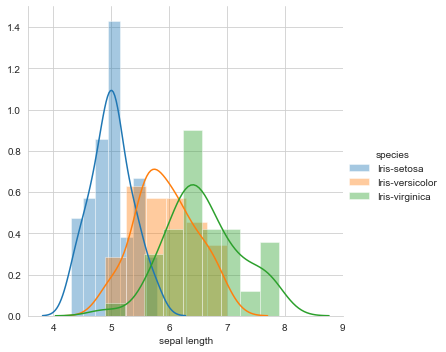

In [17]:
sns.FacetGrid(iris_df,hue = 'species',height=5)\
.map(sns.distplot,'sepal length').add_legend()

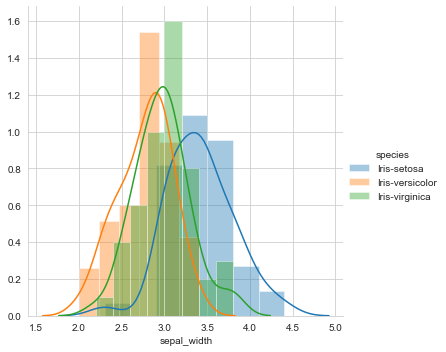

In [18]:
sns.FacetGrid(iris_df,hue = 'species',height=5)\
.map(sns.distplot,'sepal_width').add_legend()

## Cumulative distribution Function (CDF)

[0.24161074 0.08724832 0.         0.02013423 0.05369128 0.17449664
 0.19463087 0.12080537 0.0738255  0.03355705]
[1.   1.59 2.18 2.77 3.36 3.95 4.54 5.13 5.72 6.31 6.9 ]


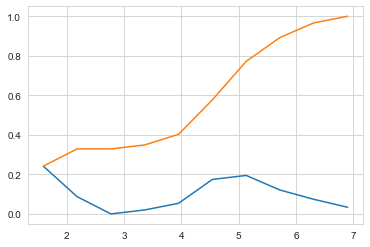

In [26]:
#plots CDF of petal_length
counts, bin_edges = np.histogram(iris_df['petal length'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)


#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

[0.02040816 0.02040816 0.04081633 0.14285714 0.2244898  0.28571429
 0.14285714 0.08163265 0.         0.04081633]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


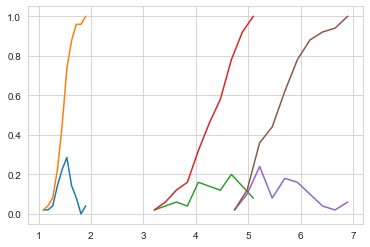

In [37]:
#why is  CDF useful 
counts1, bin_edges1 = np.histogram(iris_setosa['petal length'],bins=10,density=True)
pdf1 = counts1/(sum(counts1))
print(pdf1)
print(bin_edges1)

#CDF
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1)



counts3, bin_edges3 = np.histogram(iris_versicolor['petal length'],bins=10,density=True)
pdf3 = counts3/(sum(counts3))
print(pdf3)
print(bin_edges3)

#CDF
cdf3 = np.cumsum(pdf3)
plt.plot(bin_edges3[1:],pdf3)
plt.plot(bin_edges3[1:],cdf3)


counts2, bin_edges2 = np.histogram(iris_virginica['petal length'],bins=10,density=True)
pdf2 = counts2/(sum(counts2))
print(pdf2)
print(bin_edges2)

#CDF
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2)



if we look at the point of interection of PDF of Virginica and versicolor plants at petal_length=5 ,
if petal_length >2 and petal_length<=5 then 'Versicolor'
if petal_legth>2 and petal_length>5 then 'Virginica'

in the graph middle one is versicolor
so if petal_length<5 and if 95% of the time versicolor will be the correct answer

[0.12244898 0.         0.55102041 0.14285714 0.         0.
 0.14285714 0.         0.02040816 0.02040816]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6 ]
[0.14 0.06 0.1  0.26 0.   0.14 0.2  0.06 0.02 0.02]
[1.   1.08 1.16 1.24 1.32 1.4  1.48 1.56 1.64 1.72 1.8 ]
[0.06 0.02 0.02 0.22 0.1  0.12 0.12 0.06 0.16 0.12]
[1.4  1.51 1.62 1.73 1.84 1.95 2.06 2.17 2.28 2.39 2.5 ]


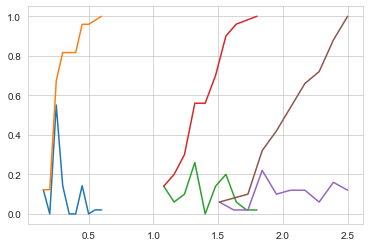

In [38]:
#why is  CDF useful 
counts1, bin_edges1 = np.histogram(iris_setosa['petal_width'],bins=10,density=True)
pdf1 = counts1/(sum(counts1))
print(pdf1)
print(bin_edges1)

#CDF
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1)



counts3, bin_edges3 = np.histogram(iris_versicolor['petal_width'],bins=10,density=True)
pdf3 = counts3/(sum(counts3))
print(pdf3)
print(bin_edges3)

#CDF
cdf3 = np.cumsum(pdf3)
plt.plot(bin_edges3[1:],pdf3)
plt.plot(bin_edges3[1:],cdf3)



counts2, bin_edges2 = np.histogram(iris_virginica['petal_width'],bins=10,density=True)
pdf2 = counts2/(sum(counts2))
print(pdf2)
print(bin_edges2)

#CDF
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2)



### Mean Variance and std-dev 

In [ ]:
plt.plot(